# Análisis Exploratorio de Datos: Exploración de Biomarcadores
Este notebook realiza el análisis exploratorio de los datos de biomarcadores obtenidos a través del proyecto ADNI 3.
    
## Objetivos del análisis
Realizar una exploración inicial de los biomarcadores presentes en los archivos:

- BIOMARK.csv

- LCRLAB.csv

- UPENNBIOMK_ROCHE_ELECSYS.csv

- URMC_LABDATA.csv

Y obtener:

1. ✅ Una visión general de las variables disponibles.
2. ✅ Analizar estadísticas descriptivas y valores faltantes.
3. ✅ Identificación de variables clave (como ABETA, TAU, PTAU, etc.)
4. ✅ Identificar correlaciones entre biomarcadores.
5. ✅ Graficar distribuciones de los biomarcadores clave.


***  

#

#### Importar Librerías

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno

In [37]:
# Configurar estilos de gráficos
sns.set(style="whitegrid")
# Configurar backend de matplotlib
%matplotlib inline

#### Cargar Datos de Biomarcadores

In [22]:
# Ruta base
base_path = "../data/raw/adni/biomarkers/"
#Archivos
files = {
    "BIOMARK": "BIOMARK.csv",
    "LCRLAB": "LCRLAB.csv",
    "ROCHE": "UPENNBIOMK_ROCHE_ELECSYS.csv",
    "URMC": "URMC_LABDATA.csv"
}

# Cargar los datos
dfs = {}
for key, filename in files.items():
    filepath = os.path.join(base_path, filename)
    dfs[key] = pd.read_csv(filepath)
    print(f"✅ {key}: {dfs[key].shape[0]} filas, {dfs[key].shape[1]} columnas")


C:\Users\alumno\AppData\Local\Temp\ipykernel_6220\4180142474.py:15: DtypeWarning: Columns (11,12,14,15,17,18,21,22,24,25,27,29,34,43,45,55,56,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[key] = pd.read_csv(filepath)


✅ BIOMARK: 13416 filas, 65 columnas
✅ LCRLAB: 8072 filas, 22 columnas
✅ ROCHE: 3174 filas, 13 columnas


C:\Users\alumno\AppData\Local\Temp\ipykernel_6220\4180142474.py:15: DtypeWarning: Columns (19,23,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  dfs[key] = pd.read_csv(filepath)


✅ URMC: 113402 filas, 28 columnas


#### Información General de los Datos

In [31]:
# Ver información del dataframe
for key, df in enumerate(dfs.items()):
    print(f"{key}:\n{df[1].info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13416 entries, 0 to 13415
Data columns (total 65 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PHASE                 13416 non-null  object 
 1   PTID                  13416 non-null  object 
 2   RID                   13416 non-null  int64  
 3   VISCODE               13416 non-null  object 
 4   VISCODE2              13407 non-null  object 
 5   EXAMDATE              13239 non-null  object 
 6   RECNO                 9783 non-null   float64
 7   BIBLOOD               13284 non-null  float64
 8   BIURINE               4226 non-null   float64
 9   BLREASON              5432 non-null   float64
 10  BIFAST                12508 non-null  float64
 11  BITIME                4756 non-null   object 
 12  BIREDTIME             13074 non-null  object 
 13  BIREDAMT              12442 non-null  float64
 14  BIREDCENT             13061 non-null  object 
 15  BIREDTRNS          

#### Explorar estructura de cada archivo

In [82]:
for key, df in dfs.items():
    print(f"\n🔎 Explorando: {key}. head() y luego describe()")
    display(df.tail())
    display(df.describe(include='all'))
    print("📍Columnas:", df.columns.tolist())
    print("📍Valores nulos por columna:")
    print(df.isnull().sum())



🔎 Explorando: BIOMARK. head() y luego describe()


,PHASE,PTID,RID,VISCODE,VISCODE2,EXAMDATE,RECNO,BIBLOOD,BIURINE,BLREASON,...,BILPOTPROC,BIFEDDATE,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
13411,ADNI4,035_S_10530,10530,4_bl,bl,2025-03-27,NaN,1.0,NaN,NaN,...,NaN,2025-03-27,78368,35,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:39:39.0
13412,ADNI4,022_S_10143,10143,4_bl,bl,2025-03-20,NaN,1.0,NaN,NaN,...,NaN,NaN,78391,22,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:39:39.0
13413,ADNI4,022_S_10143,10143,4_bl,bl,2025-03-20,NaN,1.0,NaN,NaN,...,NaN,NaN,78392,22,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:39:39.0
13414,ADNI4,022_S_10403,10403,4_bl,bl,2025-03-18,NaN,1.0,NaN,NaN,...,NaN,NaN,78439,22,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:39:39.0
13415,ADNI4,022_S_10361,10361,4_bl,bl,2025-03-27,NaN,1.0,NaN,NaN,...,NaN,NaN,78451,22,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:39:39.0


,PHASE,PTID,RID,VISCODE,VISCODE2,EXAMDATE,RECNO,BIBLOOD,BIURINE,BLREASON,...,BILPOTPROC,BIFEDDATE,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
count,13416,13416,13416.000000,13416,13407,13239,9783.000000,13284.000000,4226.000000,5432.000000,...,152,3399,13416.000000,13416.000000,13376,4426,787,787,787.000000,13416
unique,5,2708,NaN,27,40,3929,NaN,NaN,NaN,NaN,...,5,1286,NaN,NaN,4086,2031,1,1,NaN,3735
top,ADNI2,003_S_0908,NaN,bl,bl,2007-02-27,NaN,NaN,NaN,NaN,...,2,2018-07-16,NaN,NaN,2015-02-27,2009-12-09,v1,e,NaN,2013-05-10 19:16:00.0
freq,5106,21,NaN,1935,3266,18,NaN,NaN,NaN,NaN,...,133,12,NaN,NaN,24,29,787,787,NaN,801
mean,NaN,NaN,3204.869633,NaN,NaN,NaN,1.090667,0.786134,0.361098,-2.654271,...,NaN,NaN,25837.420319,44.748137,NaN,NaN,NaN,NaN,0.001271,NaN
std,NaN,NaN,2514.908354,NaN,NaN,NaN,0.293140,0.883716,1.669423,3.231187,...,NaN,NaN,44778.084652,71.254309,NaN,NaN,NaN,NaN,0.035646,NaN
min,NaN,NaN,2.000000,NaN,NaN,NaN,1.000000,-4.000000,-4.000000,-4.000000,...,NaN,NaN,3.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,830.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,-4.000000,...,NaN,NaN,2791.500000,15.000000,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,4033.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,-4.000000,...,NaN,NaN,6101.000000,33.000000,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,NaN,4900.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,-4.000000,...,NaN,NaN,10270.500000,52.000000,NaN,NaN,NaN,NaN,0.000000,NaN


📍Columnas: ['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'EXAMDATE', 'RECNO', 'BIBLOOD', 'BIURINE', 'BLREASON', 'BIFAST', 'BITIME', 'BIREDTIME', 'BIREDAMT', 'BIREDCENT', 'BIREDTRNS', 'BIREDVOL', 'BIREDFROZ', 'BILAVTIME', 'BINEEDLE', 'BILAVAMT', 'BILAVCENT', 'BILAVTRNS', 'BILAVVOL', 'BILAVFROZ', 'BIURITIME', 'BIURIAMT', 'BIURITRNS', 'BIURIVOL', 'BIURIFROZ', 'BICSF', 'BINONE', 'REASON', 'BICSFFAST', 'BICSFTIME', 'BIMETHOD', 'NEEDLESIZE', 'INTERSPACE', 'PTPOSITION', 'COLTUBETYP', 'SHPTUBETYP', 'TUBEMIN', 'BICSFAMT', 'BICSFTRNS', 'BICSFVOL', 'BICSFFROZ', 'BILPPATCH', 'BILPFLURO', 'BILPSPFILM', 'BILPPADATE', 'BILPFLDATE', 'BILPSPDATE', 'BILPPADATEYR_DRVD', 'BILPFLDATEYR_DRVD', 'BILPSPDATEYR_DRVD', 'BILPOTPROC', 'BIFEDDATE', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR', 'update_stamp']
📍Valores nulos por columna:
PHASE                       0
PTID                        0
RID                         0
VISCODE                     0
VISCODE

,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,SAMPLECOLL,LABLOOD,CTWHITE,CTRED,...,SAMPLETIME,SENTTIME,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
8067,ADNI4,130_S_10490,10490,4_bl,bl,2025-03-14,0.0,NaN,NaN,NaN,...,NaN,NaN,78364,130,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:40:21.0
8068,ADNI4,022_S_10143,10143,4_bl,bl,2025-03-20,0.0,NaN,NaN,NaN,...,NaN,NaN,78394,22,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:40:21.0
8069,ADNI4,022_S_10403,10403,4_bl,bl,2025-03-18,0.0,NaN,NaN,NaN,...,NaN,NaN,78413,22,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:40:21.0
8070,ADNI4,022_S_10361,10361,4_bl,bl,2025-03-27,0.0,NaN,NaN,NaN,...,NaN,NaN,78446,22,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:40:21.0
8071,ADNI4,127_S_6147,6147,4_init,m84,2025-03-26,1.0,1.0,1.0,160.0,...,NaN,NaN,78536,127,2025-03-27,2025-03-27,v1,e,0.0,2025-03-28 01:40:21.0


,PHASE,PTID,RID,VISCODE,VISCODE2,VISDATE,SAMPLECOLL,LABLOOD,CTWHITE,CTRED,...,SAMPLETIME,SENTTIME,ID,SITEID,USERDATE,USERDATE2,DD_CRF_VERSION_LABEL,LANGUAGE_CODE,HAS_QC_ERROR,update_stamp
count,8072,8072,8072.000000,8072,8050,8046,7151.000000,87.000000,3123.000000,3157.000000,...,2378,4825,8072.000000,8072.000000,8072,3454,623,623,623.0,8072
unique,5,2447,NaN,22,38,3243,NaN,NaN,NaN,NaN,...,361,456,NaN,NaN,3284,1639,1,1,NaN,2022
top,ADNI2,003_S_0908,NaN,bl,bl,2013-06-12,NaN,NaN,NaN,NaN,...,10:00:00,-4,NaN,NaN,2007-03-22,2017-11-02,v1,e,NaN,2016-05-23 16:54:36.0
freq,3702,13,NaN,1241,2302,11,NaN,NaN,NaN,NaN,...,70,2442,NaN,NaN,23,11,623,623,NaN,1578
mean,NaN,NaN,3985.236249,NaN,NaN,NaN,0.332541,0.712644,3.150496,134.871080,...,NaN,NaN,37151.539272,40.496407,NaN,NaN,NaN,NaN,0.0,NaN
std,NaN,NaN,2473.718712,NaN,NaN,NaN,0.471157,0.455153,12.980363,682.583551,...,NaN,NaN,53054.435400,72.708245,NaN,NaN,NaN,NaN,0.0,NaN
min,NaN,NaN,2.000000,NaN,NaN,NaN,0.000000,0.000000,-1.000000,-1.000000,...,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,0.0,NaN
25%,NaN,NaN,1414.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,1796.000000,16.000000,NaN,NaN,NaN,NaN,0.0,NaN
50%,NaN,NaN,4402.500000,NaN,NaN,NaN,0.000000,1.000000,1.000000,2.000000,...,NaN,NaN,5659.000000,32.000000,NaN,NaN,NaN,NaN,0.0,NaN
75%,NaN,NaN,6015.000000,NaN,NaN,NaN,1.000000,1.000000,2.000000,22.000000,...,NaN,NaN,64967.500000,48.000000,NaN,NaN,NaN,NaN,0.0,NaN


📍Columnas: ['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'VISDATE', 'SAMPLECOLL', 'LABLOOD', 'CTWHITE', 'CTRED', 'PROTEIN', 'GLUCOSE', 'SAMPLETIME', 'SENTTIME', 'ID', 'SITEID', 'USERDATE', 'USERDATE2', 'DD_CRF_VERSION_LABEL', 'LANGUAGE_CODE', 'HAS_QC_ERROR', 'update_stamp']
📍Valores nulos por columna:
PHASE                      0
PTID                       0
RID                        0
VISCODE                    0
VISCODE2                  22
VISDATE                   26
SAMPLECOLL               921
LABLOOD                 7985
CTWHITE                 4949
CTRED                   4915
PROTEIN                 4920
GLUCOSE                 4904
SAMPLETIME              5694
SENTTIME                3247
ID                         0
SITEID                     0
USERDATE                   0
USERDATE2               4618
DD_CRF_VERSION_LABEL    7449
LANGUAGE_CODE           7449
HAS_QC_ERROR            7449
update_stamp               0
dtype: int64

🔎 Explorando: ROCHE. head() y luego describ

,PHASE,PTID,RID,VISCODE2,EXAMDATE,BATCH,RUNDATE,ABETA40,ABETA42,TAU,PTAU,COMMENT,update_stamp
3169,ADNI3,131_S_7032,7032,bl,2022-06-09,UPENNBIOMK13,2022-06-21,23560.0,887.0,502.90,49.46,NaN,2024-01-12 11:11:42.0
3170,ADNI3,941_S_7041,7041,bl,2022-03-01,UPENNBIOMK13,2022-06-17,18370.0,1471.0,193.80,14.78,NaN,2024-01-12 11:11:42.0
3171,ADNI3,129_S_7042,7042,bl,2022-03-15,UPENNBIOMK13,2022-06-21,8690.0,820.7,95.04,NaN,PTau<8,2024-01-12 11:11:42.0
3172,ADNI3,033_S_7066,7066,bl,2022-05-11,UPENNBIOMK13,2022-06-21,10090.0,700.6,184.90,14.30,NaN,2024-01-12 11:11:42.0
3173,ADNI3,035_S_7073,7073,bl,2022-06-08,UPENNBIOMK13,2022-06-21,18590.0,1603.0,302.10,23.29,NaN,2024-01-12 11:11:42.0


,PHASE,PTID,RID,VISCODE2,EXAMDATE,BATCH,RUNDATE,ABETA40,ABETA42,TAU,PTAU,COMMENT,update_stamp
count,3174,3174,3174.000000,3174,3174,3174,3174,934.000000,3167.000000,3159.000000,3147.000000,428,3174
unique,4,1660,NaN,28,1944,4,59,NaN,NaN,NaN,NaN,9,1
top,ADNI2,022_S_0096,NaN,bl,2011-10-19,UPENNBIOMK9,2017-01-06,NaN,NaN,NaN,NaN,Abeta42>1700,2024-01-12 11:11:42.0
freq,1295,10,NaN,1621,7,2239,108,NaN,NaN,NaN,NaN,400,3174
mean,NaN,NaN,3325.721802,NaN,NaN,NaN,NaN,18130.825482,1062.012409,286.722605,27.273298,NaN,NaN
std,NaN,NaN,2235.965794,NaN,NaN,NaN,NaN,5735.600403,620.162858,128.400411,14.270766,NaN,NaN
min,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,841.000000,203.000000,80.080000,8.000000,NaN,NaN
25%,NaN,NaN,932.000000,NaN,NaN,NaN,NaN,14182.500000,592.650000,195.700000,17.175000,NaN,NaN
50%,NaN,NaN,4190.500000,NaN,NaN,NaN,NaN,17700.000000,870.400000,256.900000,23.540000,NaN,NaN
75%,NaN,NaN,4961.500000,NaN,NaN,NaN,NaN,21537.500000,1423.500000,344.150000,33.455000,NaN,NaN


📍Columnas: ['PHASE', 'PTID', 'RID', 'VISCODE2', 'EXAMDATE', 'BATCH', 'RUNDATE', 'ABETA40', 'ABETA42', 'TAU', 'PTAU', 'COMMENT', 'update_stamp']
📍Valores nulos por columna:
PHASE              0
PTID               0
RID                0
VISCODE2           0
EXAMDATE           0
BATCH              0
RUNDATE            0
ABETA40         2240
ABETA42            7
TAU               15
PTAU              27
COMMENT         2746
update_stamp       0
dtype: int64

🔎 Explorando: URMC. head() y luego describe()


,PHASE,PTID,RID,VISCODE,VISCODE2,SampleDate,SampleTime,RecDate,RecTime,KitID,...,ResultValueConv,LowerRangeConv,UpperRangeConv,UnitsConv,ResultValueSI,LowerRangeSI,UpperRangeSI,UnitsSI,Fasting,update_stamp
113397,ADNI4,941_S_7046,7046,4_init,m36,2025-02-18,09:26:00,2025-02-20,11:18:00,6513450,...,NEG,NEG,NaN,NaN,NEG,NEG,NaN,NaN,Y,2025-03-17 10:33:24.0
113398,ADNI4,941_S_7046,7046,4_init,m36,2025-02-18,09:26:00,2025-02-20,11:18:00,6513450,...,6.7,2.7,6.8,mg/dL,0.395,0.159,0.401,mmol/L,Y,2025-03-17 10:33:24.0
113399,ADNI4,941_S_7046,7046,4_init,m36,2025-02-18,09:26:00,2025-02-20,11:18:00,6513450,...,1.019,1.002,1.030,NaN,1.019,1.002,1.030,NaN,Y,2025-03-17 10:33:24.0
113400,ADNI4,941_S_7046,7046,4_init,m36,2025-02-18,09:26:00,2025-02-20,11:18:00,6513450,...,1.0,.,<2.0,mg/dL,1.0,.,<2.0,mg/dL,Y,2025-03-17 10:33:24.0
113401,ADNI4,941_S_7046,7046,4_init,m36,2025-02-18,09:26:00,2025-02-20,11:18:00,6513450,...,5.7,3.5,11.0,10^3/uL,5.7,3.5,11.0,10^9/L,Y,2025-03-17 10:33:24.0


,PHASE,PTID,RID,VISCODE,VISCODE2,SampleDate,SampleTime,RecDate,RecTime,KitID,...,ResultValueConv,LowerRangeConv,UpperRangeConv,UnitsConv,ResultValueSI,LowerRangeSI,UpperRangeSI,UnitsSI,Fasting,update_stamp
count,113402,113402,113402.000000,113402,110069,113402,113402,113402,113402,1.134020e+05,...,97262,87969,80830,94617,97262,87969,80830,94617,54671,113402
unique,2,1601,NaN,13,29,934,458,945,210,NaN,...,2645,109,112,18,2854,118,157,20,3,631
top,ADNI3,131_S_7032,NaN,sc,sc,2025-02-25,12:30:00,2025-02-20,10:32:00,NaN,...,NEG,0,5.2,mg/dL,NEG,0,35,mmol/L,Y,2025-02-24 14:52:38.0
freq,58731,183,NaN,58333,84274,735,2479,751,1892,NaN,...,5464,7083,2493,25855,5464,7083,2192,25013,28416,49232
mean,NaN,NaN,7313.613702,NaN,NaN,NaN,NaN,NaN,NaN,6.382053e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,1964.048765,NaN,NaN,NaN,NaN,NaN,NaN,1.343211e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.174088e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,6300.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.225388e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,6725.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.381406e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,10021.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.511678e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


📍Columnas: ['PHASE', 'PTID', 'RID', 'VISCODE', 'VISCODE2', 'SampleDate', 'SampleTime', 'RecDate', 'RecTime', 'KitID', 'TestID', 'TestName', 'ResultValue', 'Flags', 'Comments', 'LowerRange', 'UpperRange', 'Units', 'ResultValueConv', 'LowerRangeConv', 'UpperRangeConv', 'UnitsConv', 'ResultValueSI', 'LowerRangeSI', 'UpperRangeSI', 'UnitsSI', 'Fasting', 'update_stamp']
📍Valores nulos por columna:
PHASE                   0
PTID                    0
RID                     0
VISCODE                 0
VISCODE2             3333
SampleDate              0
SampleTime              0
RecDate                 0
RecTime                 0
KitID                   0
TestID               1770
TestName                0
ResultValue           478
Flags              101459
Comments           112152
LowerRange          10252
UpperRange          30682
Units               20845
ResultValueConv     16140
LowerRangeConv      25433
UpperRangeConv      32572
UnitsConv           18785
ResultValueSI       16140
LowerR

#### Visualizar Valores Faltantes

<Figure size 1000x800 with 0 Axes>

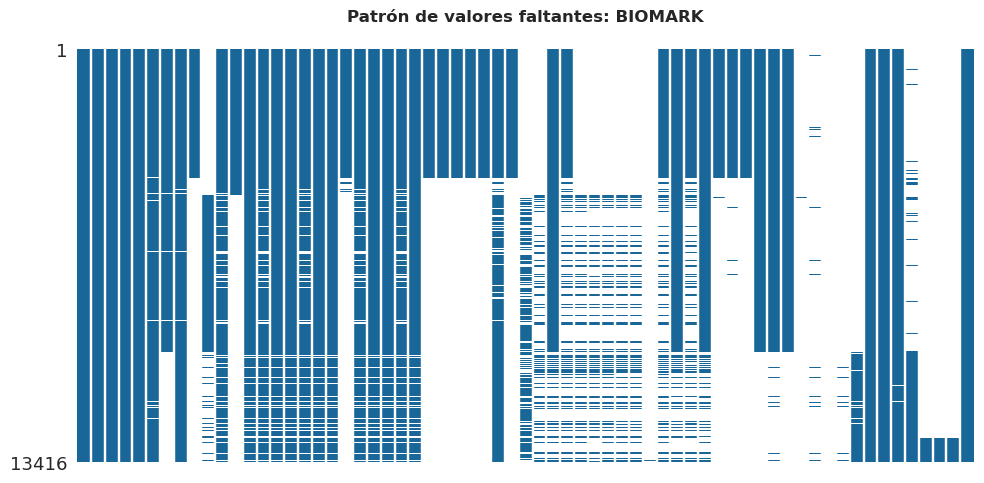

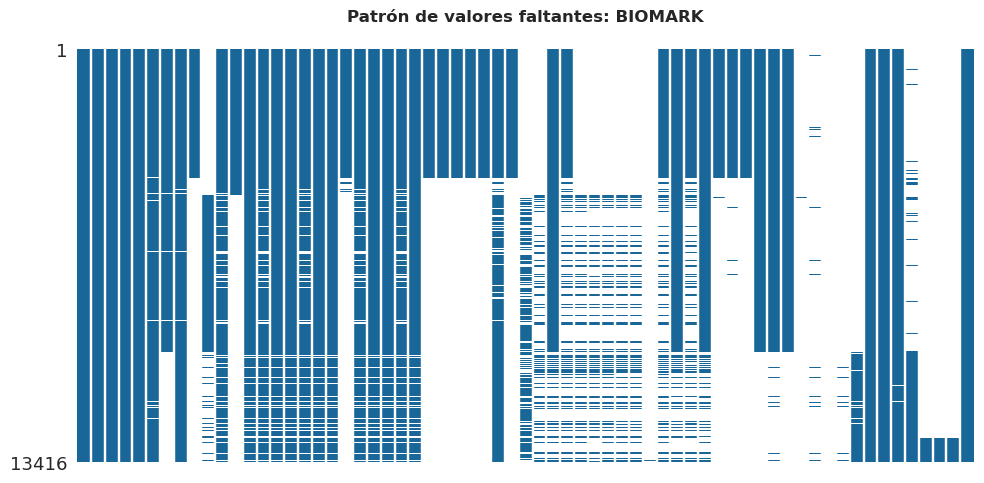

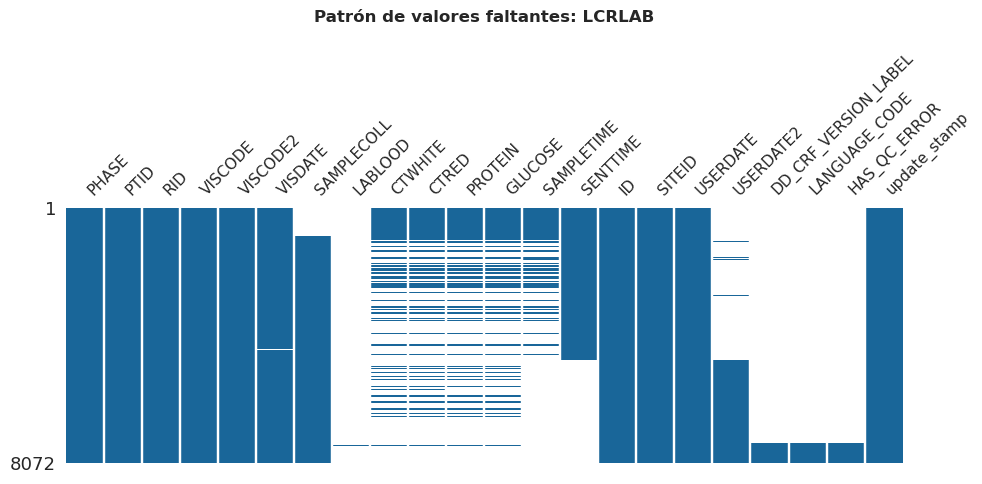

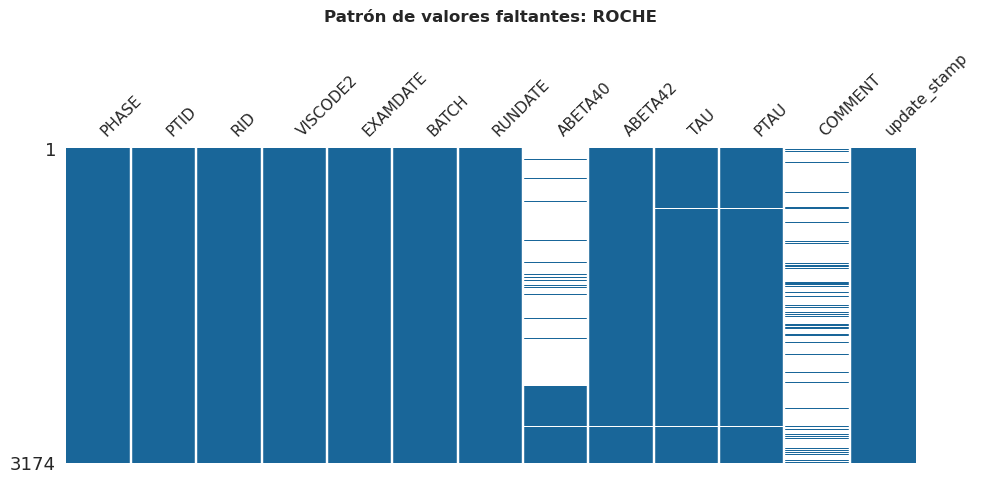

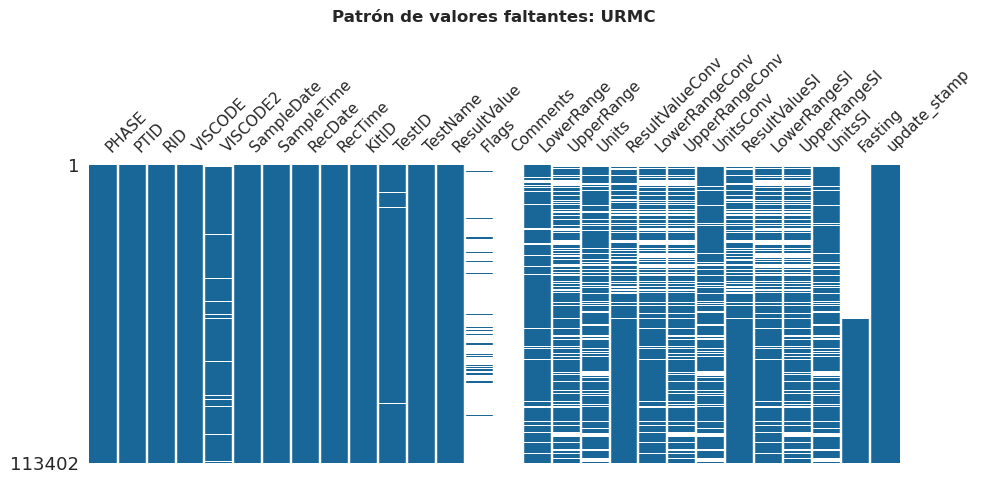

In [87]:
# Visualización de valores faltantes por conjunto de datos con 'missingno' 
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

for key, df in dfs.items():
    # msno.matrix ya retorna un Axes, no necesitamos asignarlo a 'fig'
    ax = msno.matrix(
        df,
        figsize=(10, 5),
        color=(0.1, 0.4, 0.6),
        sparkline=False,
        fontsize=11
    )
    plt.title(f"Patrón de valores faltantes: {key}", pad=20, fontweight='bold')
    ax.grid(False)  # Desactivar grid directamente en el Axes
    
    plt.tight_layout()
    #plt.savefig(f"..\reports\data\plotsmissing_values_{key}.png", dpi=300, bbox_inches='tight')
    plt.show()

Utilización de heatmaps para la muestra de correlaciones entre valores faltantes 👇

📌 Missing values - BIOMARK


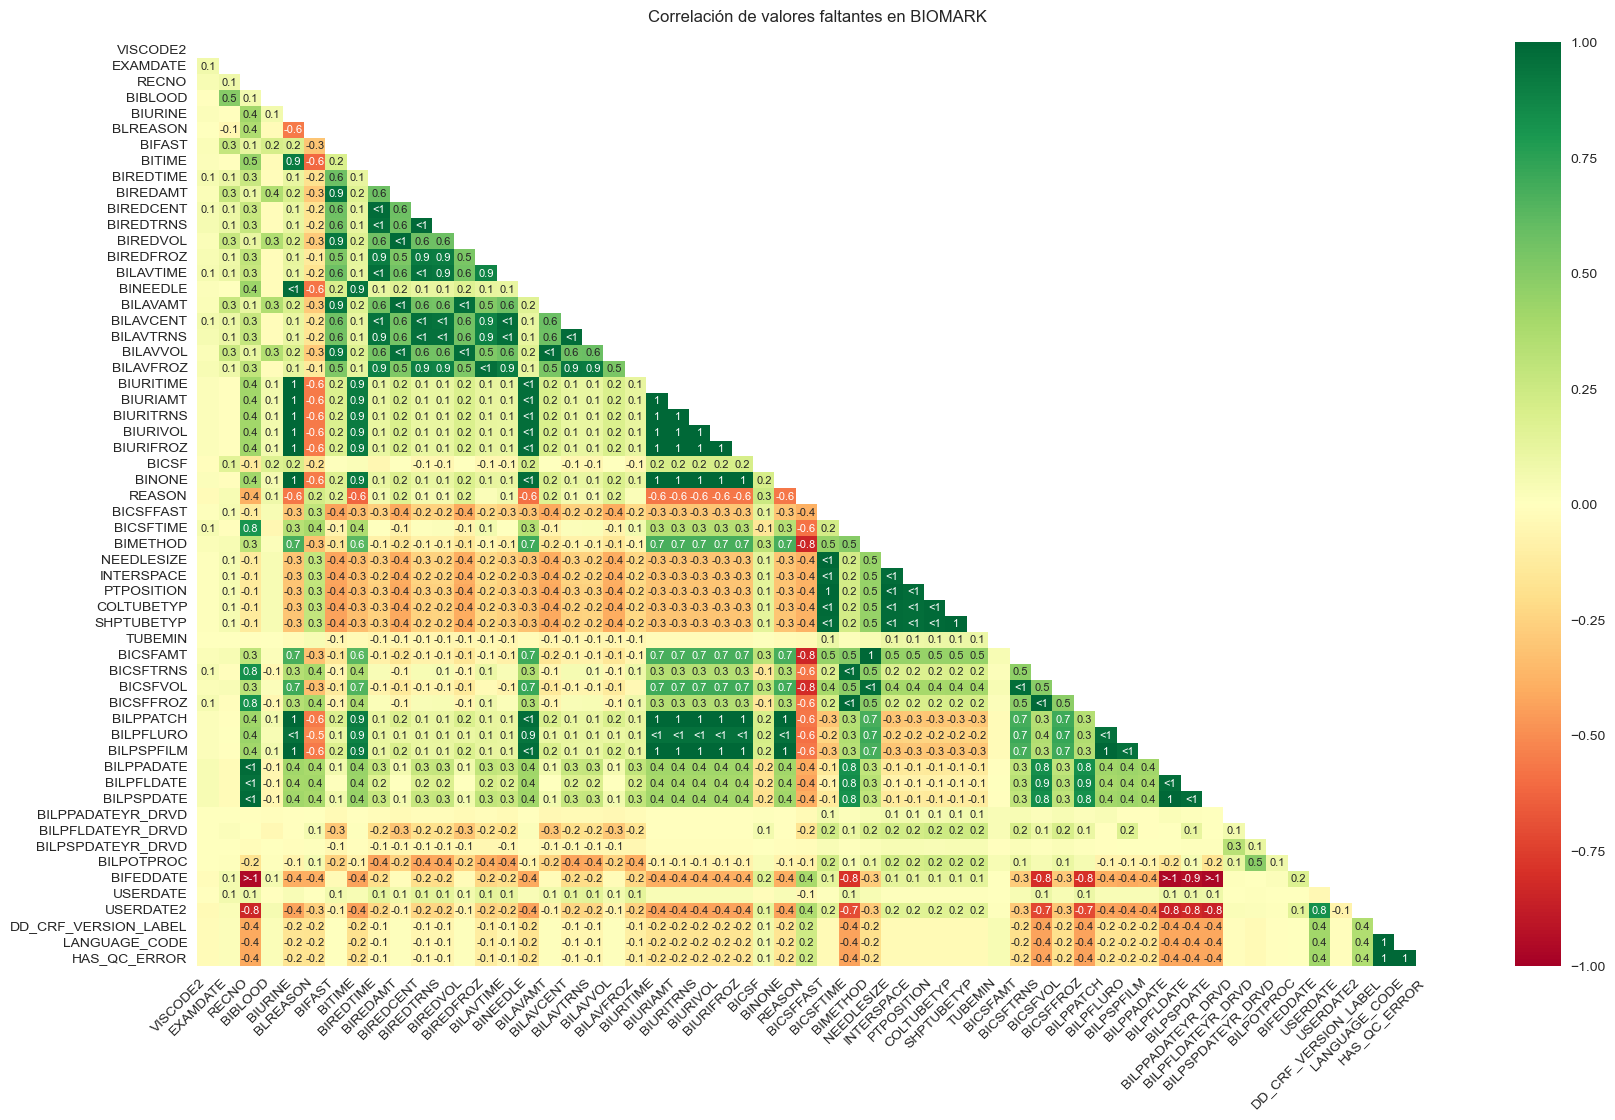

📌 Missing values - LCRLAB


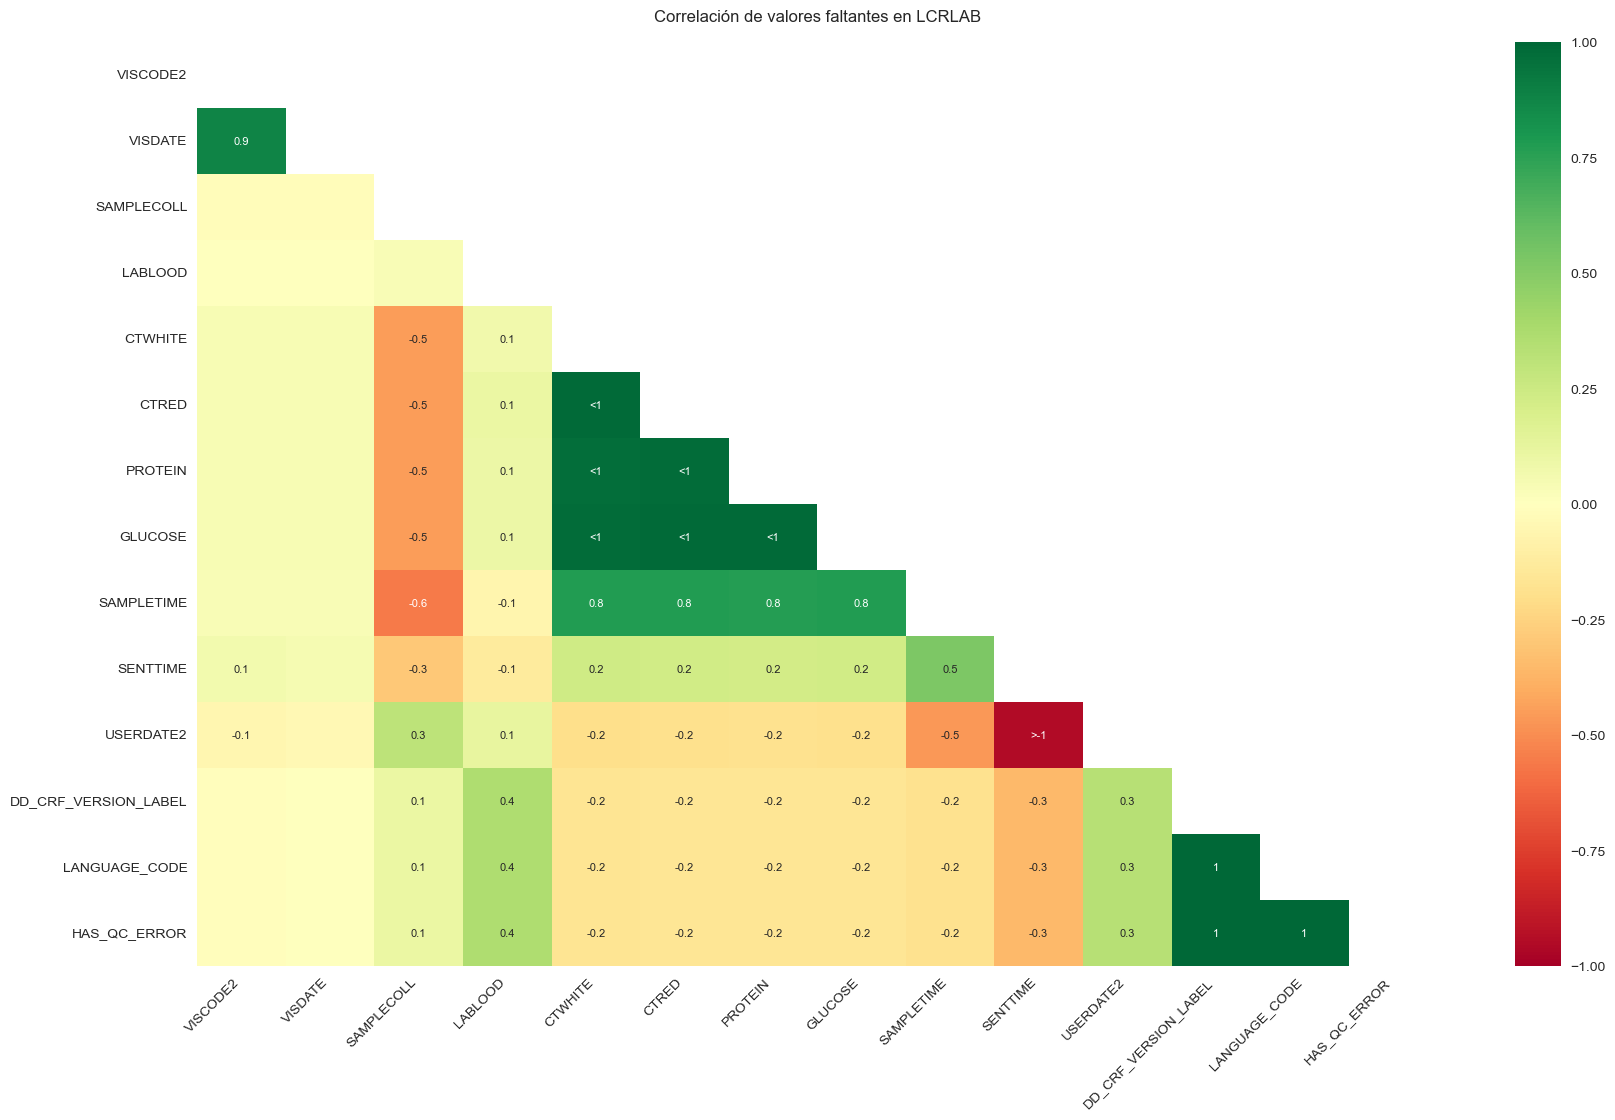

📌 Missing values - ROCHE


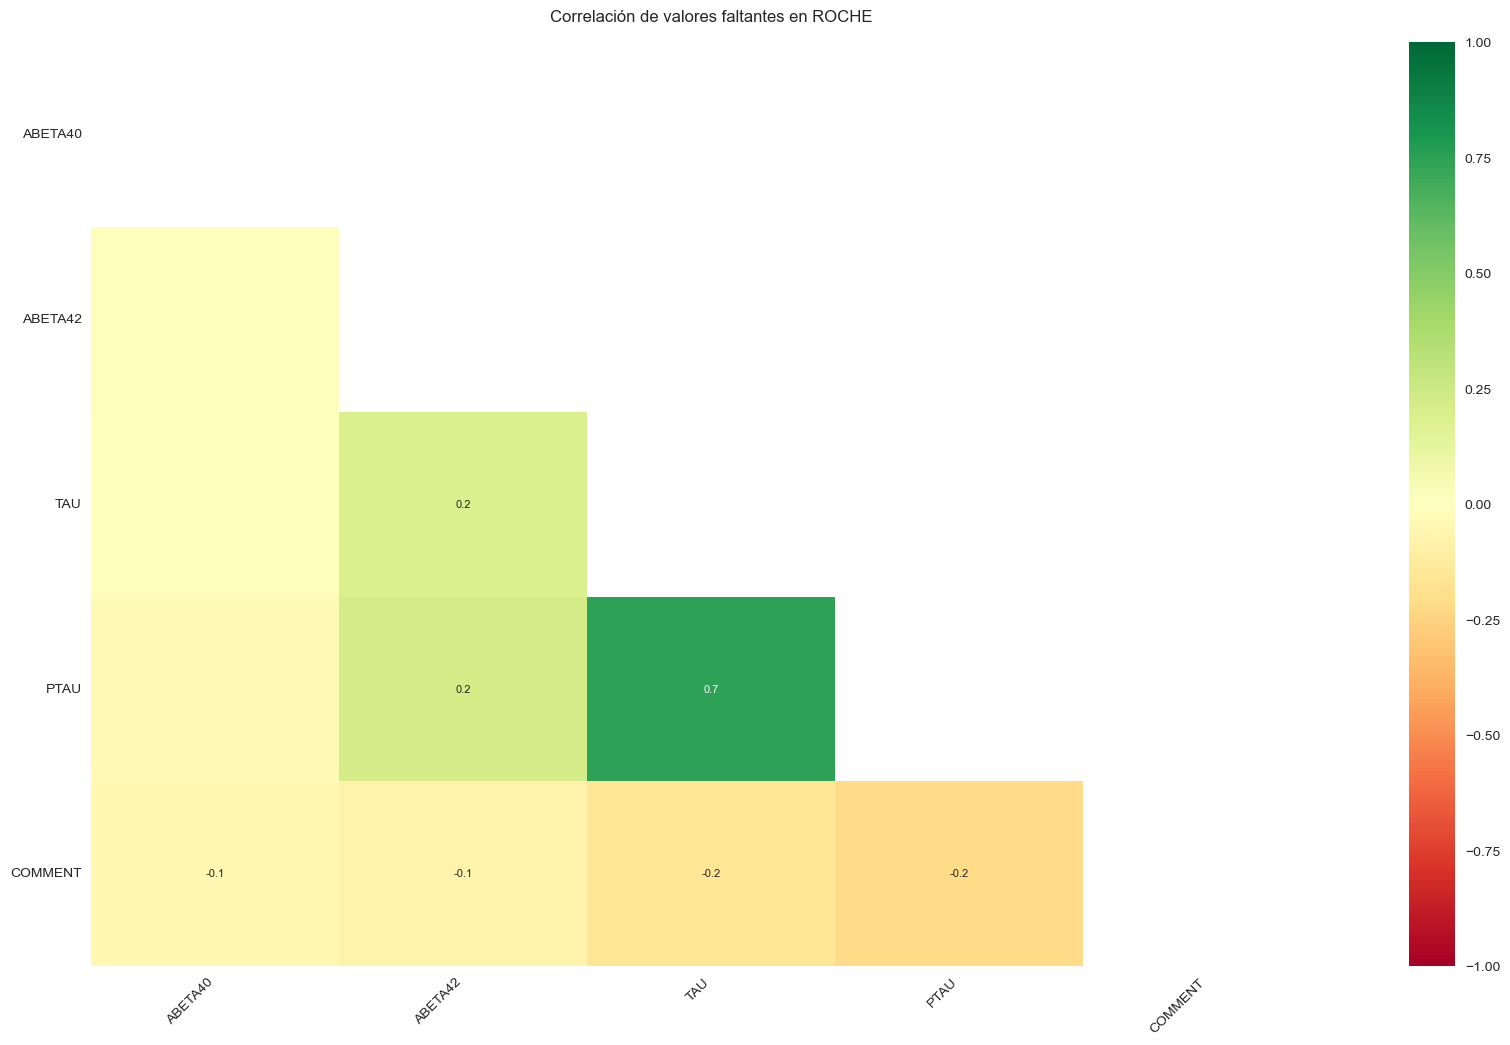

📌 Missing values - URMC


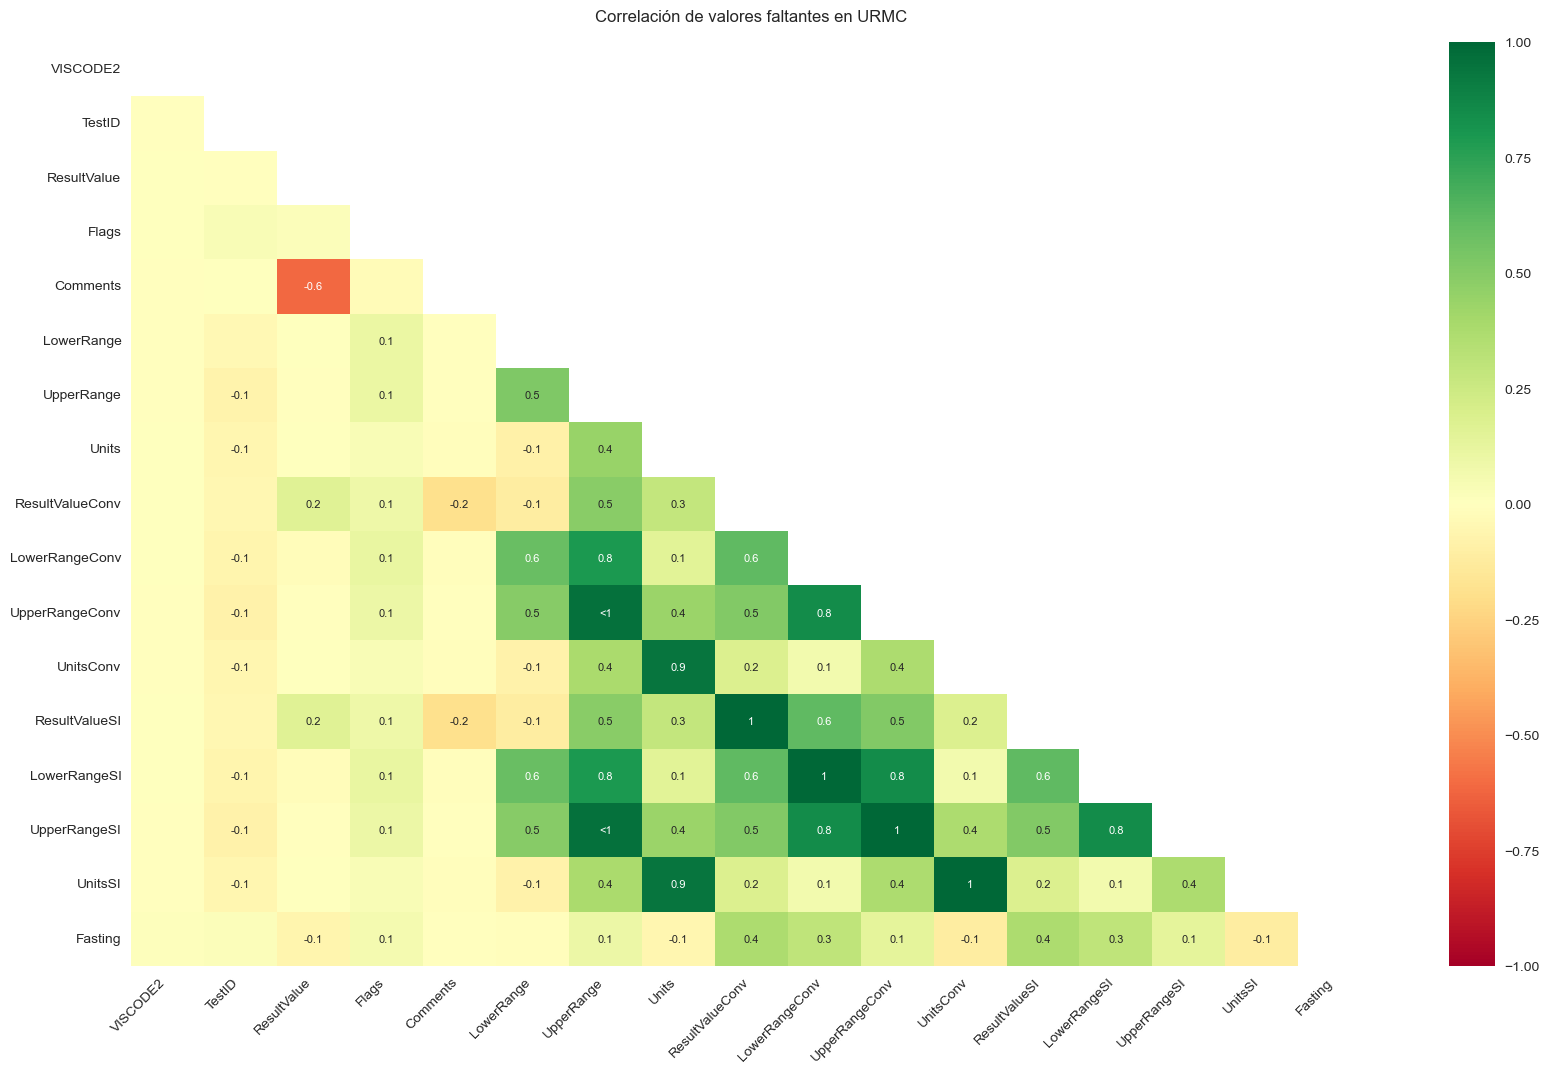

In [40]:
for key, df in dfs.items():
    print(f"📌 Missing values - {key}")
    msno.heatmap(df, cmap='RdYlGn', fontsize=10)  # Escala rojo-amarillo-verde
    plt.title(f"Correlación de valores faltantes en {key}", pad=15)
    plt.show()

#### Verificar presencia de variables clave

In [58]:
# Lista extendida de biomarcadores a buscar
biomarcadores_clave = [
    'ABETA', 'TAU', 'PTAU', 'ApoE', 'p217', 'NfL', 'GFAP',
    'YKL', 'CHI3L1', 'TREM2', 'alpha-synuclein', 'IL', 'TNF', 'BDNF',
    'albumin', 'clusterin', 'neurogranin', 'Ng', 'TPRO', 'VILIP',
    'CLU', 'CR1', 'PICALM', 'BIN1', 'MAPT', 'PSEN1', 'PSEN2', 'APP',
    'glucose', 'creatinine', 'hemoglobin', 'cortisol', 'cholesterol','TREM2'
]


In [60]:
#  Función para detectar columnas relevantes
def buscar_biomarcadores(df, lista_keywords):
    cols_encontradas = [col for col in df.columns if any(keyword.lower() in col.lower() for keyword in lista_keywords)]
    return cols_encontradas

# 6. Buscar en cada archivo
biomarcadores_por_archivo = {name: buscar_biomarcadores(df, biomarcadores_clave) for name, df in dfs.items()}
biomarcadores_por_archivo

{'BIOMARK': ['BILAVTIME',
  'BILAVAMT',
  'BILAVCENT',
  'BILAVTRNS',
  'BILAVVOL',
  'BILAVFROZ',
  'BILPPATCH',
  'BILPFLURO',
  'BILPSPFILM',
  'BILPPADATE',
  'BILPFLDATE',
  'BILPSPDATE',
  'BILPPADATEYR_DRVD',
  'BILPFLDATEYR_DRVD',
  'BILPSPDATEYR_DRVD',
  'BILPOTPROC',
  'LANGUAGE_CODE'],
 'LCRLAB': ['GLUCOSE', 'LANGUAGE_CODE'],
 'ROCHE': ['ABETA40', 'ABETA42', 'TAU', 'PTAU'],
 'URMC': ['LowerRange',
  'UpperRange',
  'LowerRangeConv',
  'UpperRangeConv',
  'LowerRangeSI',
  'UpperRangeSI',
  'Fasting']}

#### Distribución y Correlación de Biomarcadores Clave

##### Archivo UPENNBIOMK_ROCHE_ELECSYS.csv

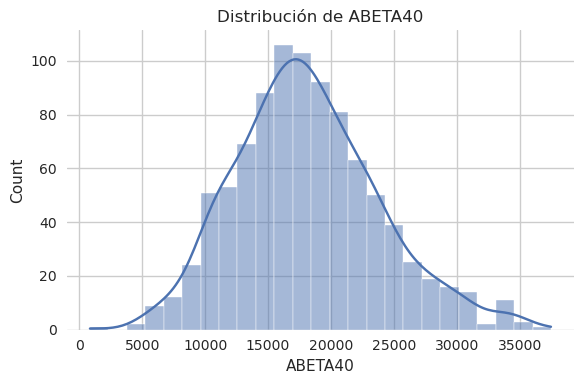

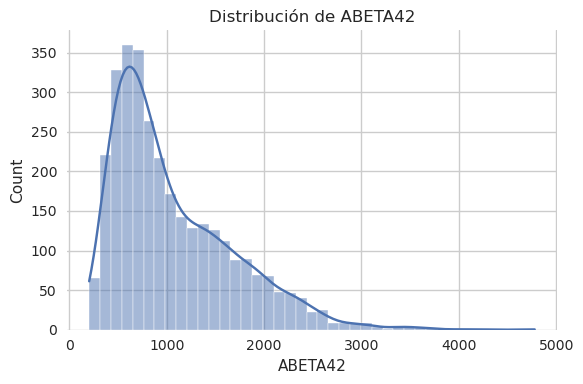

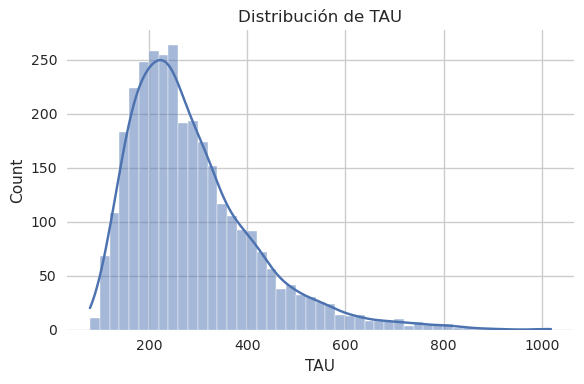

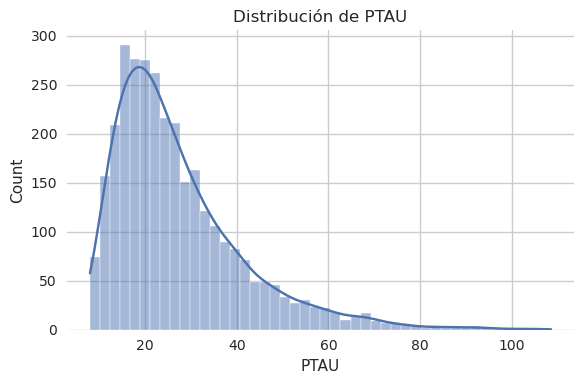

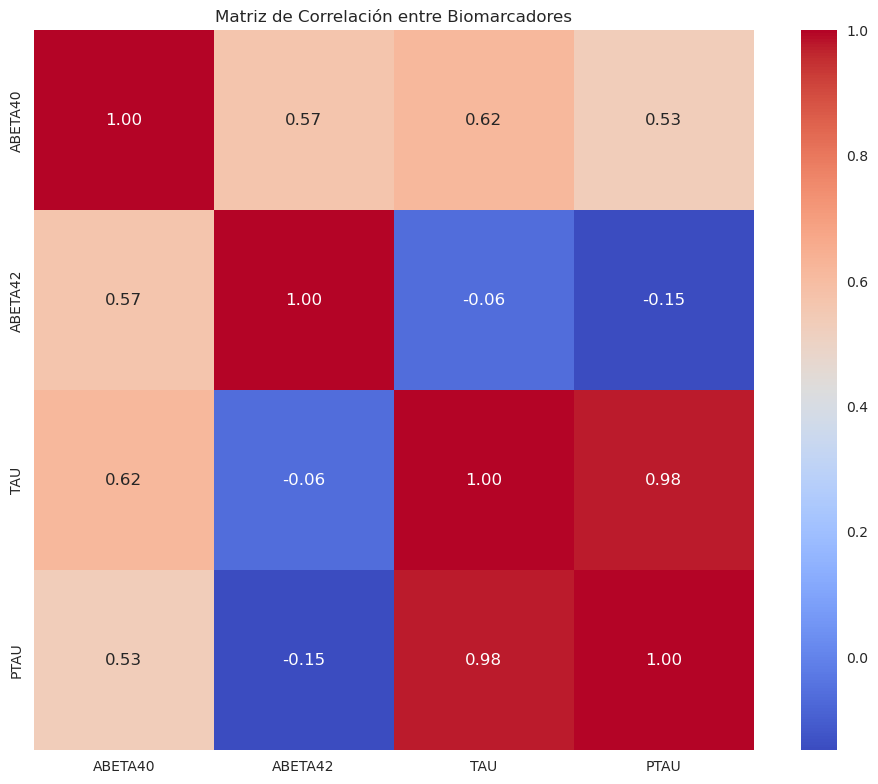

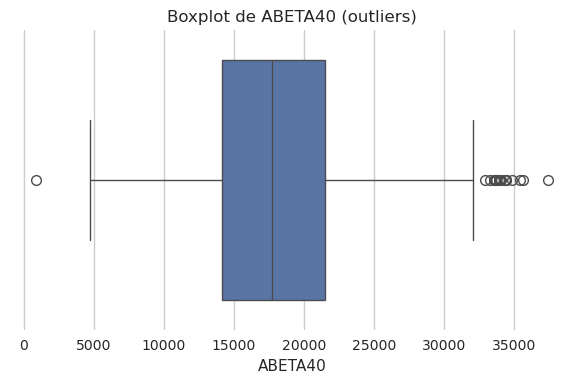

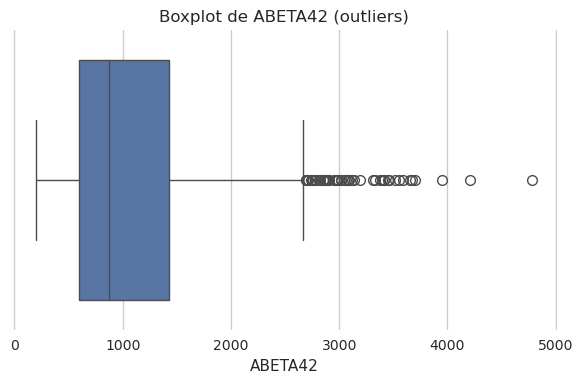

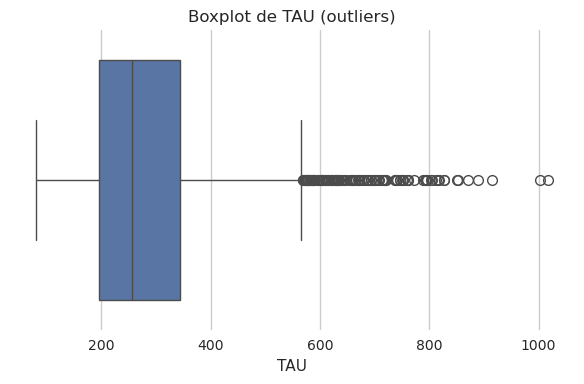

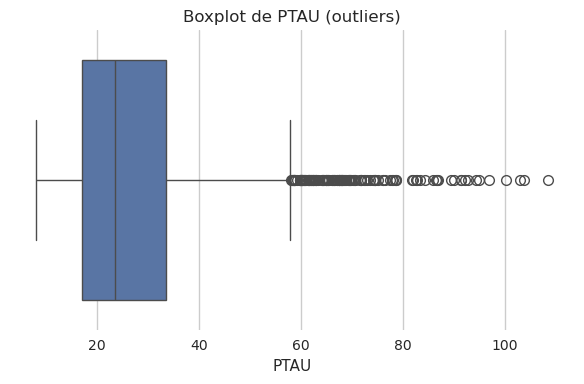

In [88]:
# Elegimos un archivo que tenga varios biomarcadores, por ejemplo: ROCHE
df_viz = dfs['ROCHE']
cols_viz = biomarcadores_por_archivo['ROCHE']

# Eliminamos columnas no numéricas o con muchos NaN
cols_numericas = [col for col in cols_viz if df_viz[col].dtype != 'object' and df_viz[col].notna().sum() > 50]

# Histograma + KDE
for col in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_viz[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()


# Matriz de correlación
df_corr = df_viz[cols_numericas].dropna()
plt.figure(figsize=(10, 8))
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlación entre Biomarcadores")
plt.tight_layout()
plt.show()

# Boxplots para detección de outliers
for col in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_viz[col])
    plt.title(f'Boxplot de {col} (outliers)')
    plt.tight_layout()
    plt.show()


Podemos observar que la distribución de los biomarcadores en este archivo tienen una distribución normal. 

Respecto a las correlaciones podemos observar que PTAU y TAU tienen una fuerte correlación (98%).

TAU y PTAU también tienen muchos valores atípicos por encima de la máxima.

##### Archivo BIOMARK.csv

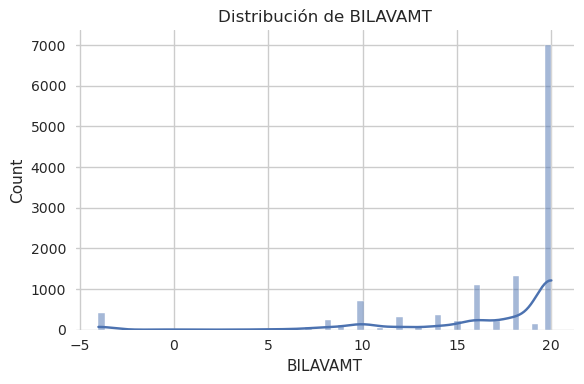

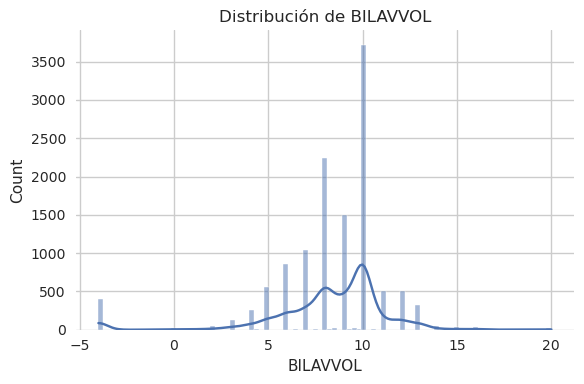

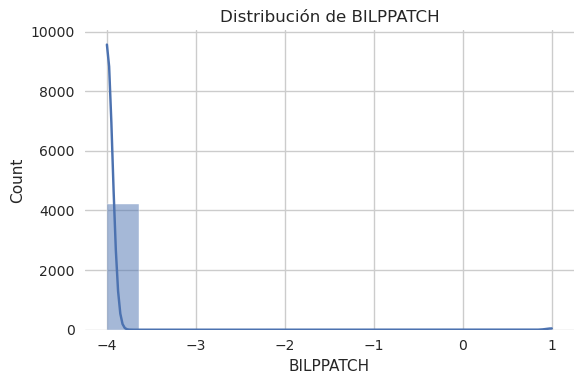

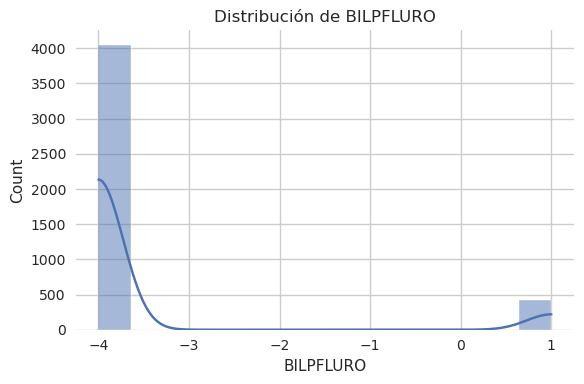

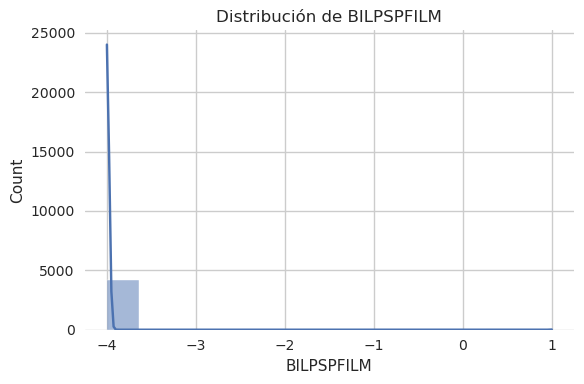

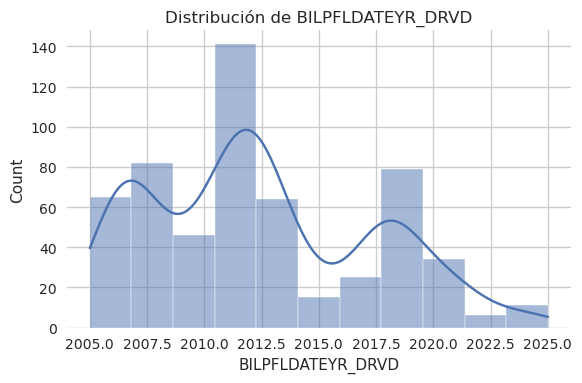

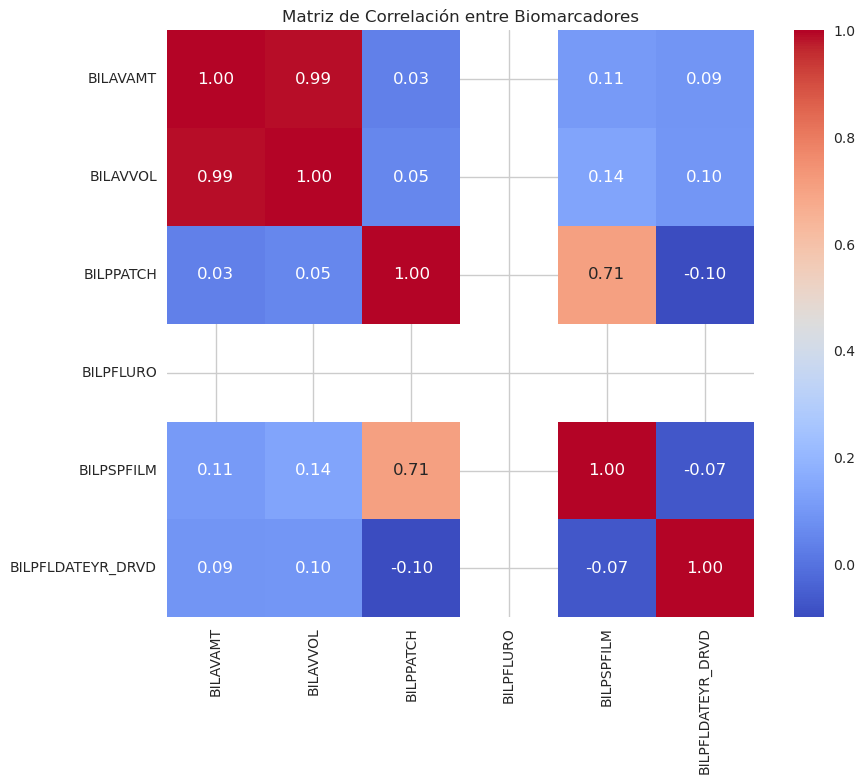

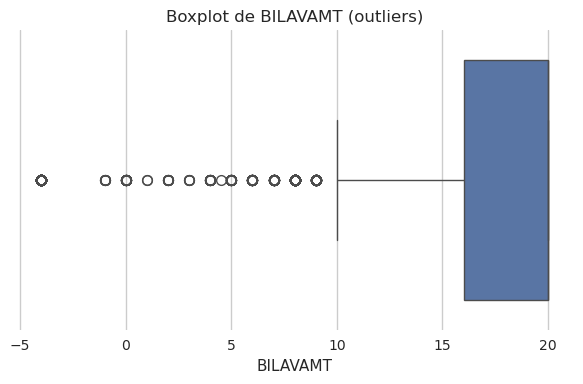

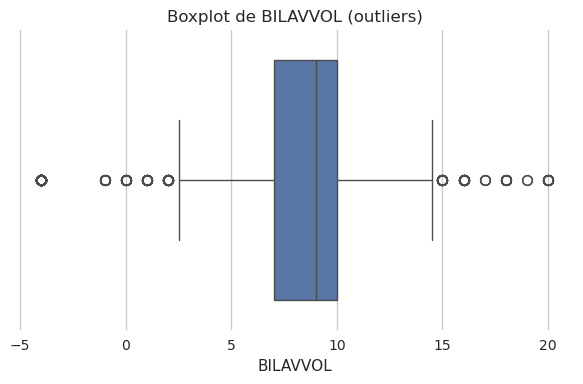

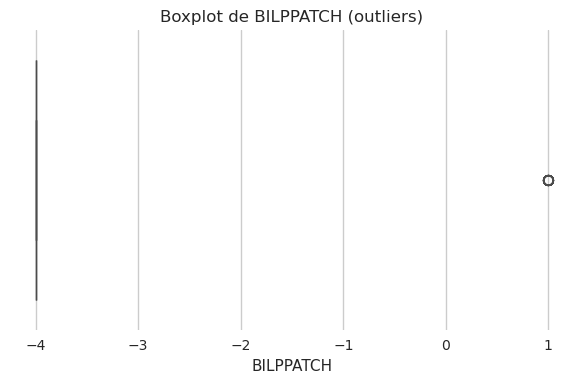

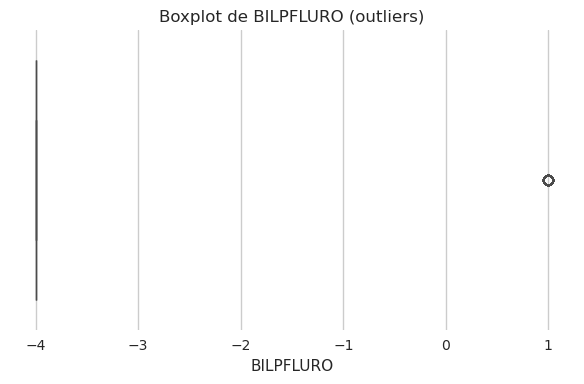

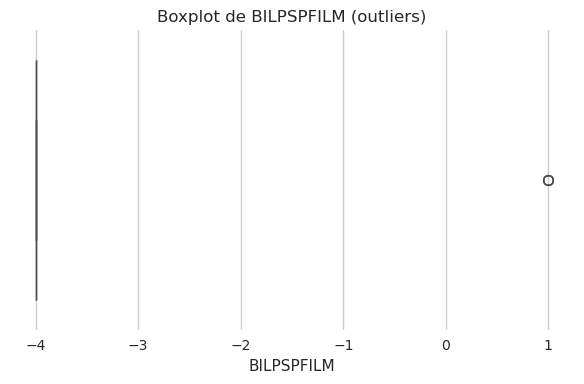

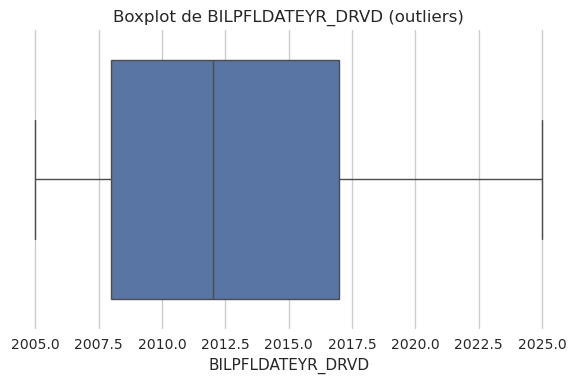

In [66]:
# Elegimos un archivo que tenga varios biomarcadores, por ejemplo: ROCHE
df_viz = dfs['BIOMARK']
cols_viz = biomarcadores_por_archivo['BIOMARK']

# Eliminamos columnas no numéricas o con muchos NaN
cols_numericas = [col for col in cols_viz if df_viz[col].dtype != 'object' and df_viz[col].notna().sum() > 50]

# Histograma + KDE
for col in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_viz[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

# Matriz de correlación
df_corr = df_viz[cols_numericas].dropna()

plt.figure(figsize=(10, 8))
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlación entre Biomarcadores")
plt.tight_layout()
plt.show()

# Boxplots para detección de outliers
for col in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_viz[col])
    plt.title(f'Boxplot de {col} (outliers)')
    plt.tight_layout()
    plt.show()


Podemos observar que la distribución de todas las variables en este archivo no tienen una distribución normal, lo cual indica que quizás no sean las mas apropiadas para el análisis.

##### Archivo LCRLAB.csv

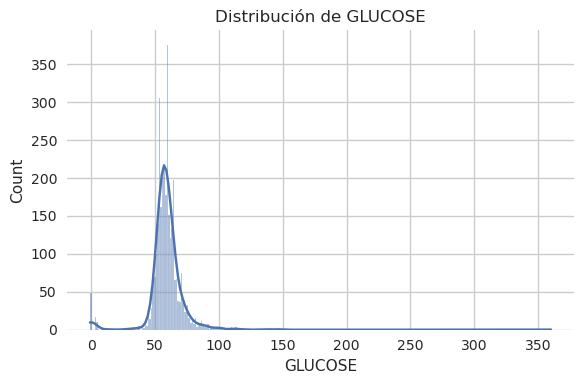

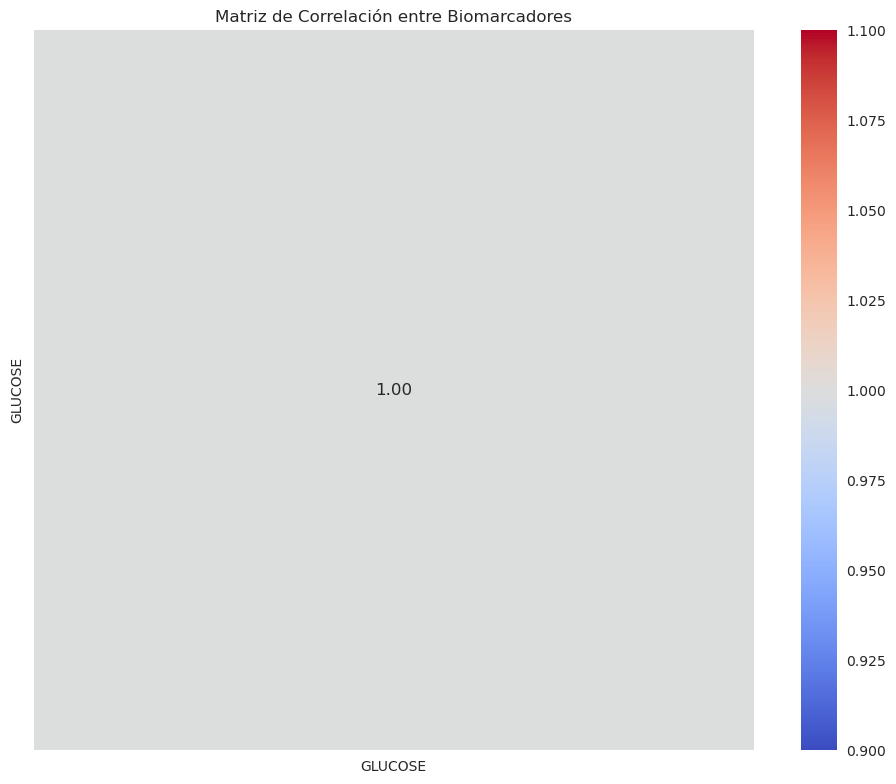

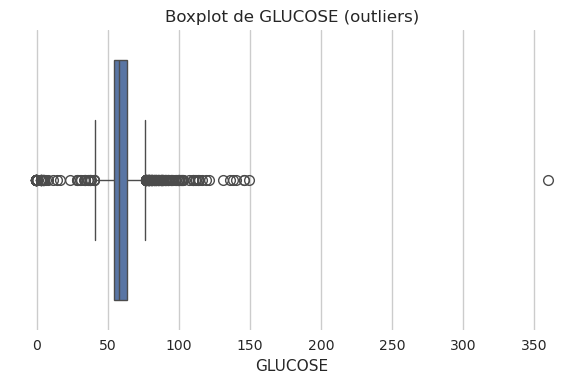

In [67]:
# Elegimos un archivo que tenga varios biomarcadores, por ejemplo: ROCHE
df_viz = dfs['LCRLAB']
cols_viz = biomarcadores_por_archivo['LCRLAB']

# Eliminamos columnas no numéricas o con muchos NaN
cols_numericas = [col for col in cols_viz if df_viz[col].dtype != 'object' and df_viz[col].notna().sum() > 50]

# Histograma + KDE
for col in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_viz[col].dropna(), kde=True)
    plt.title(f'Distribución de {col}')
    plt.tight_layout()
    plt.show()

# Matriz de correlación
df_corr = df_viz[cols_numericas].dropna()

plt.figure(figsize=(10, 8))
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlación entre Biomarcadores")
plt.tight_layout()
plt.show()

# Boxplots para detección de outliers
for col in cols_numericas:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_viz[col])
    plt.title(f'Boxplot de {col} (outliers)')
    plt.tight_layout()
    plt.show()


Aquí observamos que la distribucion de los valores en la Glucosa es, en un rango (de 40 a 80 aproximadamente), normal.
respecto a los valores atípicos podemos ver que esta variable posee muchos valores inusuales, tanto debajo de la mínima como por encima de la máxima.

Archivo URMC_LABDATA.csv

In [74]:
# Biomarcadores encontrados en URMC_LABDATA
cols_urmc = biomarcadores_por_archivo['URMC']
print("Columnas encontradas:", cols_urmc)

df_urmc = dfs['URMC']

# Filtrar columnas numéricas con más de 50 datos no nulos
cols_numericas_urmc = [
    col for col in cols_urmc if df_urmc[col].dtype != 'object' and df_urmc[col].notna().sum() >= 1
]

print("Columnas numéricas con suficientes datos:", cols_numericas_urmc)

if len(cols_numericas_urmc) > 1:
    df_corr_urmc = df_urmc[cols_numericas_urmc].dropna()

    if not df_corr_urmc.empty:
        plt.figure(figsize=(10, 8))
        corr_matrix_urmc = df_corr_urmc.corr()
        sns.heatmap(corr_matrix_urmc, annot=True, fmt=".2f", cmap='coolwarm', square=True)
        plt.title("Matriz de Correlación - URMC")
        plt.tight_layout()
        plt.show()
    else:
        print("❌ No hay suficientes datos sin NaN para generar la matriz de correlación.")
else:
    print("❌ No hay columnas numéricas válidas con suficientes datos para correlacionar.")


Columnas encontradas: ['LowerRange', 'UpperRange', 'LowerRangeConv', 'UpperRangeConv', 'LowerRangeSI', 'UpperRangeSI', 'Fasting']
Columnas numéricas con suficientes datos: []
❌ No hay columnas numéricas válidas con suficientes datos para correlacionar.


Particularmente para este archivo y para las columnas de interés en el no se podrá visualizar la distribución de las variables claves, el mapa de calor que muestra las correlaciones ni los diagramas de caja para visualizar los valor atípicos.

#### Guardar columnas detectadas

In [79]:
pd.DataFrame(dict([(k, pd.Series(v)) for k, v in biomarcadores_por_archivo.items()])).to_csv(
    "../reports/data/biomarcadores_detectados_por_archivo.csv", index=False)


Ahora guardaremos los nombres de las columnas por archivo para revisar luego, en caso de ser necesario.

In [80]:
for key, df in dfs.items():
    pd.Series(df.columns).to_csv(f"../reports/data/{key}_columnas.csv", index=False)


### Observaciones
- Identificamos biomarcadores clave en los archivos: TAU, PTAU, Glucosa
- Archivo con mayor cantidad de valores faltantes: BIOMARK
- Algunas variables requieren estandarización de nombres/unidades. Como por ejemplo la columna 'UnitsSI' del archivo URMC
- Próximo paso: limpieza y normalización de estos biomarcadores
